<h1>DEMO Notebook</h1>
<h2>Using imexam inside a Jupyter notebook with Ginga</h2>
<p align="left"> The Ginga HTML5 canvas viewer can be used as a viewer for the imexam package. While the Ginga viewer is active you have access to all the imexam as well as all the Ginga functions the HTML viewer provides. Some of the examples of Ginga functionality were taken directly from a Ginga demo notebook available on the Ginga github repo.</p>

<p align="left"> This and other demo notebooks can be found on the SpaceTelescope github site: https://github.com/spacetelescope/imexam/</p>




In [1]:
#start the notebook: jupyter notebook
import matplotlib
matplotlib.use('nbAgg') #use this backend for getting plots inside the %notebook

In [2]:
import imexam

In [3]:
a=imexam.connect(viewer='ginga') #stars up a new tab with the ginga HTML5 viewer

In [4]:
a.load_fits('iacs01t4q_flt.fits') #display fits image in a separate browser window

<p align="left">When using a Ginga window the imexam() function is event driven. This means that while looking at the image, pressing the "i" key will enter you into imexam mode. Subsequent pressing of the "q" key will put you back in regular viewing mode. </p>

<p align="left">While in imexam mode, the analysis keys are mapped to the imexam functions and the results will be returned in the notebook</p>

2	make the next plot in a new window
a	aperture sum, with radius region_size 
b	return the 2d gauss fit center of the object
c	return column plot
e	return a contour plot in a region around the cursor
g	return curve of growth plot
h	return a histogram in the region around the cursor
j	1D [Gaussian1D|Moffat1D] line fit 
k	1D [Gaussian1D|Moffat1D] column fit
l	return line plot
m	square region stats, in [region_size],default is median
r	return the radial profile plot
s	save current figure to disk as [plot_name]
t	make a fits image cutout using pointer location
w	display a surface plot around the cursor location
x	return x,y,value of pixel
y	return x,y,value of pixel


Press the i key in the graphics window for access                  to imexam keys, or q to exit

read: e at 621.75390625, 271.556640625


<IPython.core.display.Javascript object>


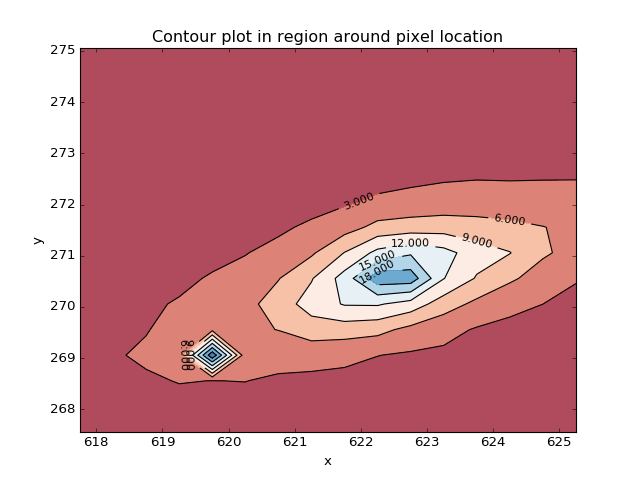

In [5]:
#No list of commands is printed with the event driven imexam, but you can always 
#see what the available commands are by issuing the imexam() call:
a.imexam()

<p align="left">The text printed above the plot: "read: e at x y" , means that the "e" key was pressed at those image coordinates. The "e" instructs imexam to make a contour plot.</p>



In [6]:
# all of the plots are customizable; the parameters are stored in regular dictionaries
a.eimexam()

{'ceiling': [None, 'Maximum value to be contoured'],
 'cmap': ['RdBu', 'Colormap (matplotlib style) for image'],
 'floor': [None, 'Minimum value to be contoured'],
 'function': ['contour'],
 'label': [True, 'Label major contours with their values? [bool]'],
 'linestyle': ['--', 'matplotlib linestyle'],
 'ncolumns': [15, 'Number of columns'],
 'ncontours': [8, 'Number of contours to be drawn'],
 'nlines': [15, 'Number of lines'],
 'title': ['Contour plot in region around pixel location',
  'Title of the plot'],
 'xlabel': ['x', 'The string for the xaxis label'],
 'ylabel': ['y', 'The string for the yaxis label']}

In [7]:
#example of accessing the plot parameter dictionary directly for customization
a.set_plot_pars('e','title','My custom plot title')
a.set_plot_pars('e','floor',0.)
a.set_plot_pars('e','ncontours',4)

set title to My custom plot title
set floor to 0.0
set ncontours to 4


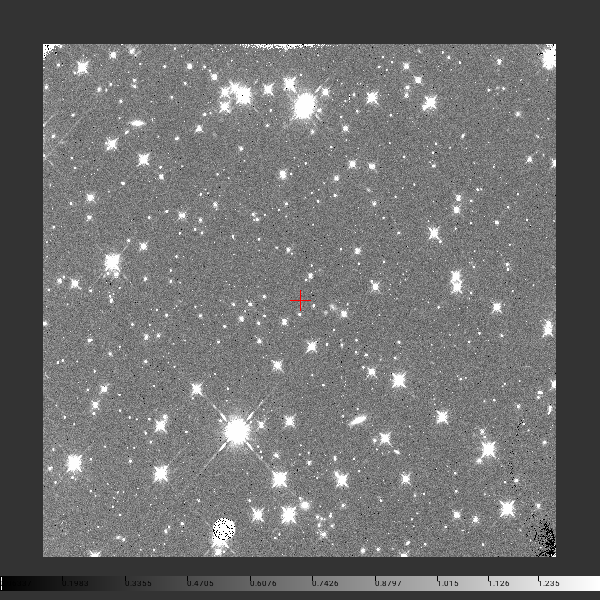

read: e at 617.796875, 269.578125


<IPython.core.display.Javascript object>


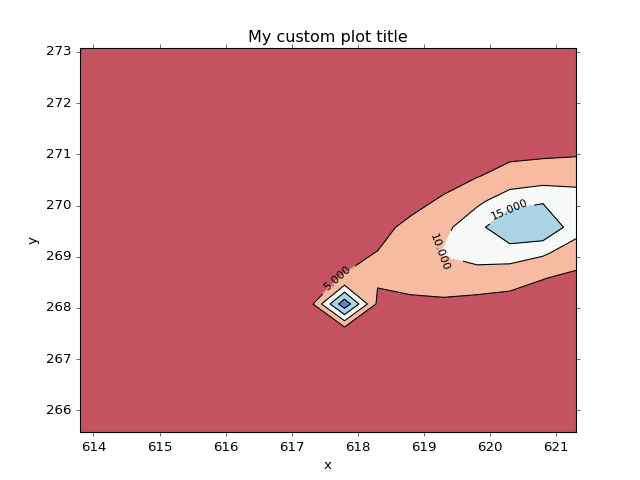

In [8]:
# you can  save a copy of the current viewing window
a.window.ginga_view.show()

read: a at 531.6215277777777, 415.1577932098765
xc=532.361545	yc=415.578015
x              y              radius         flux           mag(zpt=25.00)                               sky            fwhm
532.36         415.58         5              2511.34        16.50                         0.77           1.77
read: r at 531.6215277777777, 415.1577932098765
xc=532.361545	yc=415.578015
Sky per pixel: 0.8751087080798768 using                         (rad=10.0->15.0)


<IPython.core.display.Javascript object>


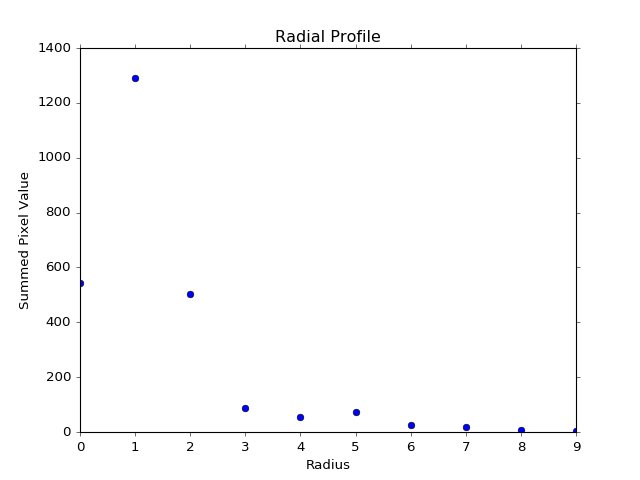

In [9]:
#besides making plots you can also get basic aperture photometry using the "a" key and radial plots with "r"

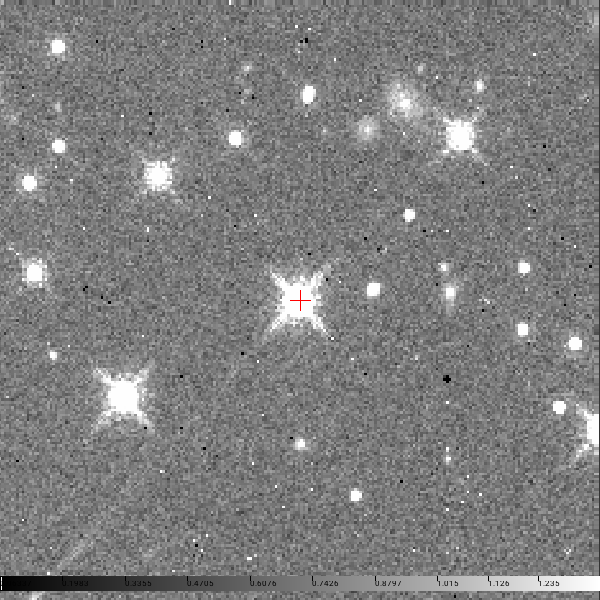

In [10]:
#The above photometry was for this source
a.window.ginga_view.show()

In [11]:
#You can also request a numpy array of the data being viewed:
data=a.get_data()

In [12]:
data

array([[  0.83070785,   0.77805561,   0.76478052, ...,   3.57433248,
          1.76538277,  13.27517891],
       [  0.81140989,   0.81358504,   0.82697475, ...,   0.93461889,
          6.13800716,   8.34170818],
       [  0.79158789,   0.64857799,   0.77130139, ...,   9.15612221,
          9.71294022,   5.86870718],
       ..., 
       [ 24.58002281,  14.42533588,  15.89180183, ...,  15.45005512,
         17.82489586,  20.00450897],
       [  0.60127252,  25.4940033 ,  17.80608749, ...,   7.73149157,
         25.98257256,  22.03309822],
       [ 10.51517963,  23.97153091,  20.60639   , ...,   1.63613272,
         11.7840147 ,  29.51210213]], dtype=float32)

In [13]:
#you can look at the header as well
a.get_header()

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 1014                                                  
NAXIS2  =                 1014                                                  
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
ORIGIN  = 'HSTIO/CFITSIO March 2010'                                            
DATE    = '2015-10-23' / date this file was written (yyyy-mm-dd)                
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1 / extension version number                       
ROOTNAME= 'iacs01t4q        

In [14]:
#if you are using the ginga viewer, you can return the full Ginga image object and use any
#of the methods which are enabled for it. You can look here for the Ginga quick reference: 
#http://ginga.readthedocs.org/en/latest/quickref.html
img=a.get_image()

In [15]:
type(img)

ginga.AstroImage.AstroImage

In [16]:
img.height, img.width, img.pixtoradec(100,100)

(1014, 1014, (47.322932767726684, 61.58835777004116))

In [17]:
img.pixtoradec(100,100)

(47.322932767726684, 61.58835777004116)

In [18]:
canvas=a.window.ginga_view.add_canvas()
canvas.delete_all_objects()
canvas.set_drawtype('rectangle')

#now you can go to the viewer and draw a rectangle selection box

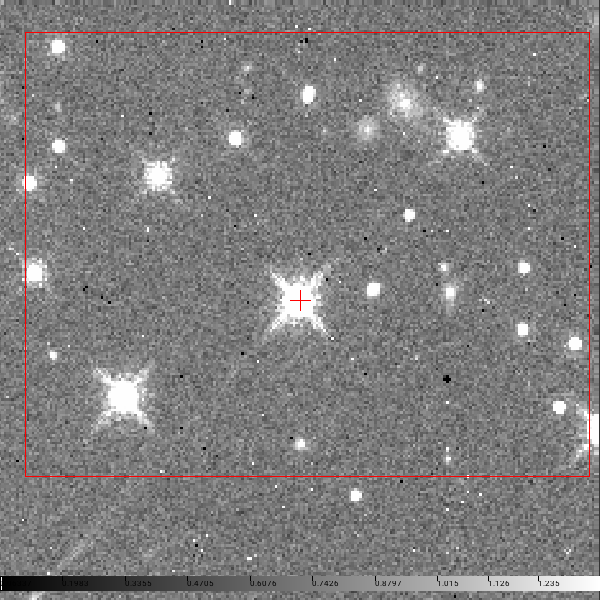

In [19]:
a.window.ginga_view.show()

In [20]:
from ginga.util import iqcalc
iq = iqcalc.IQCalc()

#find all the peaks in the rectangle area
r = canvas.objects[0]
data = img.cutout_shape(r)
peaks = iq.find_bright_peaks(data)

In [21]:
peaks[:10] #show the last 10 peaks detected in the cutout

[(165.0, 7.0),
 (165.0, 11.0),
 (108.0, 13.0),
 (33.0, 25.0),
 (44.0, 25.0),
 (209.0, 27.0),
 (38.0, 31.0),
 (33.0, 37.0),
 (44.0, 37.0),
 (128.0, 46.0)]

In [22]:
objs = iq.evaluate_peaks(peaks, data)

In [23]:
o1=objs[0]
o1

{'brightness': 2.851329750750755, 'fwhm_y': 0.8914224059051343, 'objy': 10.806088927958054, 'x': 165, 'pos': 0.9520617643970948, 'background': 0.7047627568244934, 'fwhm_radius': 15, 'elipse': 0.6575025873676695, 'fwhm_x': 1.355770187116631, 'objx': 165.2101713239533, 'skylevel': 40.74000089466572, 'y': 7, 'fwhm': 1.1473331482232967}

In [24]:
# pixel coords are for cutout, so add back in origin of cutout
#  to get full data coords RA, DEC of first object
x1, y1, x2, y2 = r.get_llur()
img.pixtoradec(x1+o1.objx, y1+o1.objy)

(47.3607583380415, 61.59798356489521)

In [25]:
# Draw circles around all objects
Circle = canvas.get_draw_class('circle')
for obj in objs:
    x, y = x1+obj.objx, y1+obj.objy
    if r.contains(x, y):
        canvas.add(Circle(x, y, radius=10, color='yellow'))
        
# set pan and zoom to center
a.window.ginga_view.set_pan((x1+x2)/2, (y1+y2)/2)
a.window.ginga_view.scale_to(0.75, 0.75)

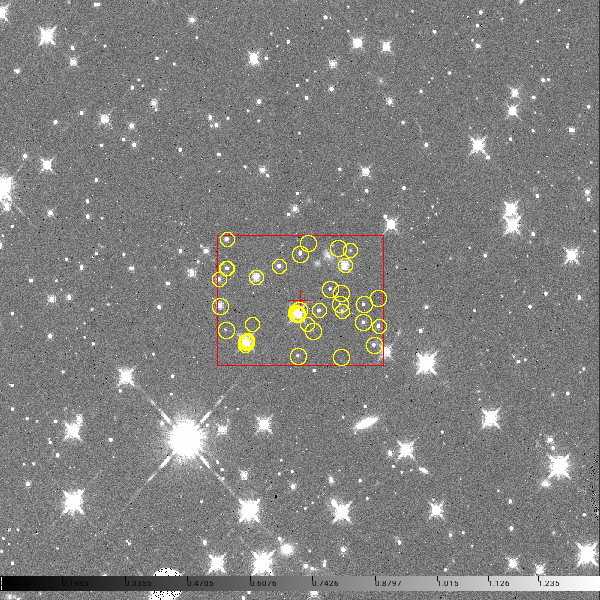

In [26]:
a.window.ginga_view.show()